In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_excel(r'C:\Users\kelvi\Desktop\ORIE5257 2024 Assignment.xlsx')

In [3]:
sorted_data = data.sort_values(by='Bond')
sorted_data.head()

,Time,Bond,Side,Notional,Counterparty,MidPrice,QuotedPrice,Competitors,Traded,nextMidPrice
499,2134,US Treasury 10Y,ASK,500000,RelativeValueStrategies,95.979,95.949,3,DONE,95.942
498,2133,US Treasury 10Y,BID,100000,RelativeValueStrategies,95.138,95.028,2,MISSED,95.156
494,2116,US Treasury 10Y,BID,1000000,SniperFund,93.384,93.321,3,DONE,93.264
491,2100,US Treasury 10Y,BID,10000000,HF-Fortress,94.762,94.673,3,DONE,95.030
480,2053,US Treasury 10Y,BID,2500000,HF-Fortress,96.494,96.401,6,MISSED,96.579


In [4]:
bond_list = data['Bond'].unique()
bond_list

array(['US Treasury 5Y', 'US Treasury 3Y', 'US Treasury 10Y',
       'US Treasury 30Y', 'US Treasury 2Y'], dtype=object)

#### Statistical Summary

Statistical Summary:
               Time      Notional     MidPrice  QuotedPrice  Competitors  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean   2168.761000  2.818100e+06    98.285810    98.283187     4.002000   
std    1262.441783  3.371883e+06     3.526557     3.529484     2.006994   
min       5.000000  1.000000e+05    86.464000    86.407000     1.000000   
25%    1097.750000  2.500000e+05    96.029500    95.949750     2.000000   
50%    2136.500000  1.000000e+06    98.829000    98.831000     4.000000   
75%    3230.000000  5.000000e+06   101.187750   101.157000     6.000000   
max    4409.000000  1.000000e+07   105.712000   105.626000     7.000000   

       nextMidPrice  
count   1000.000000  
mean      98.282039  
std        3.533389  
min       86.357000  
25%       95.983000  
50%       98.860500  
75%      101.200750  
max      105.671000  

Success Rate by Counterparty and Side:
 Traded                            DONE    MISSED
Counterparty  

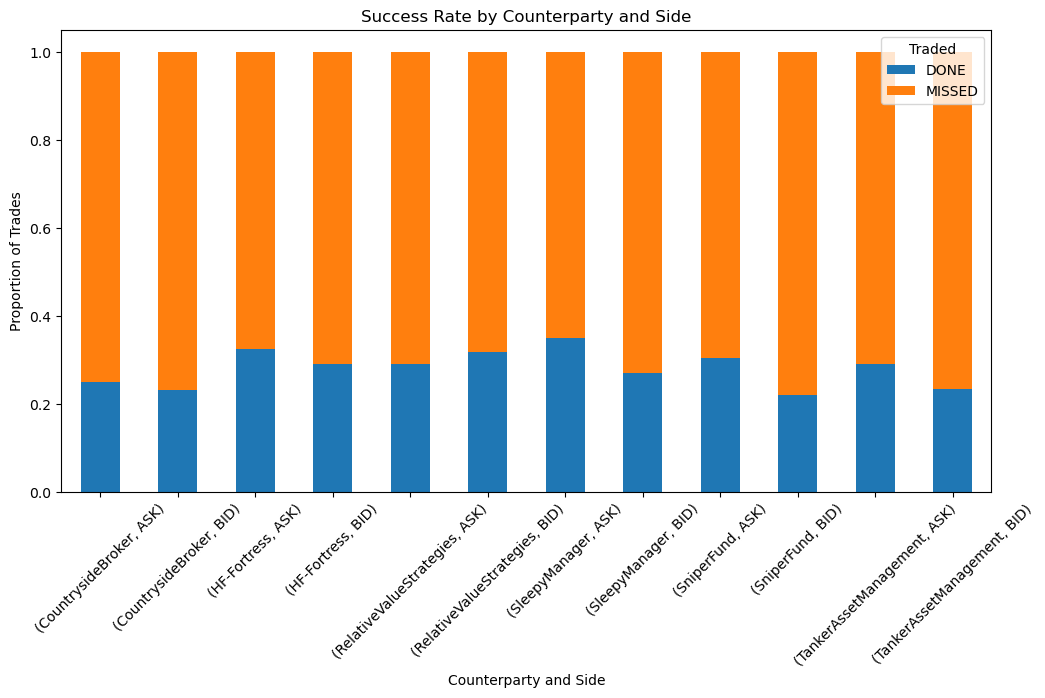

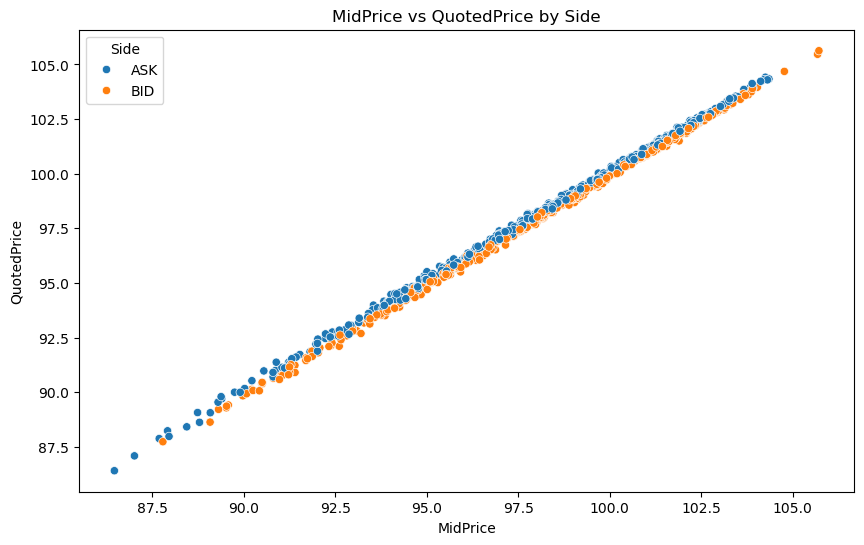

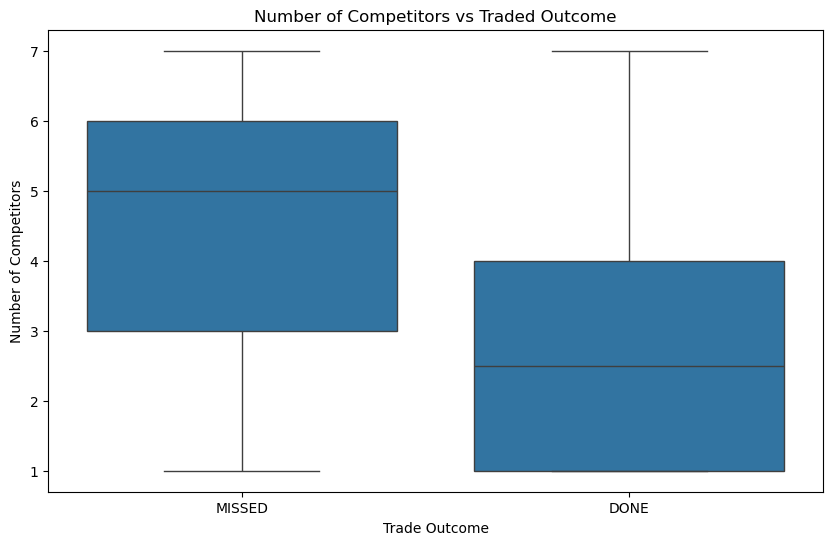

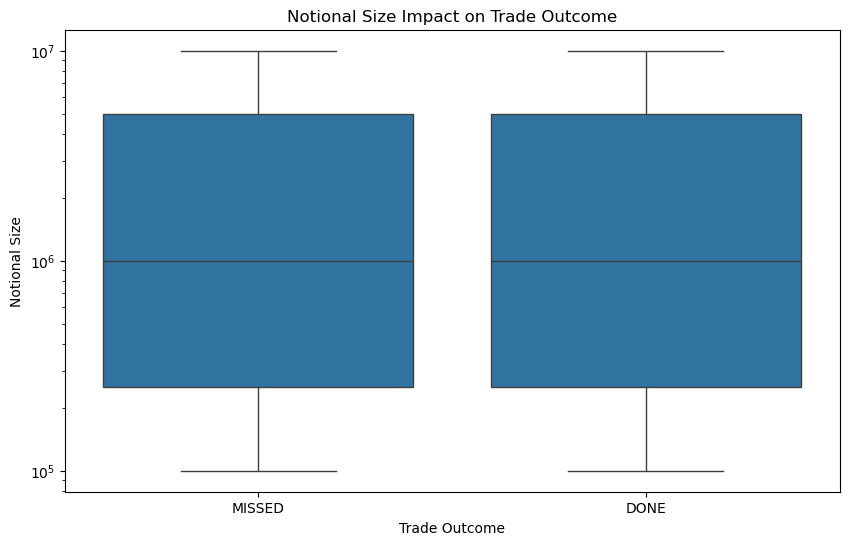

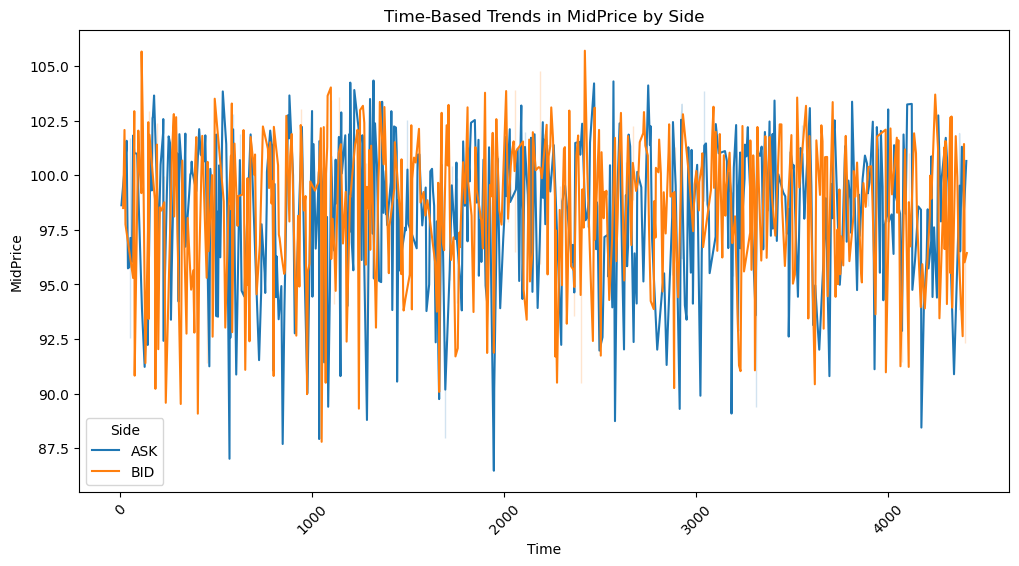

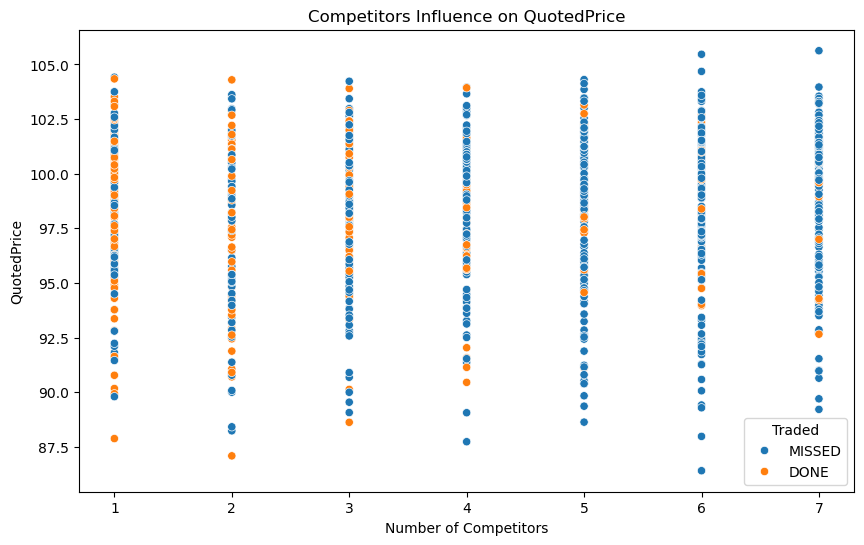

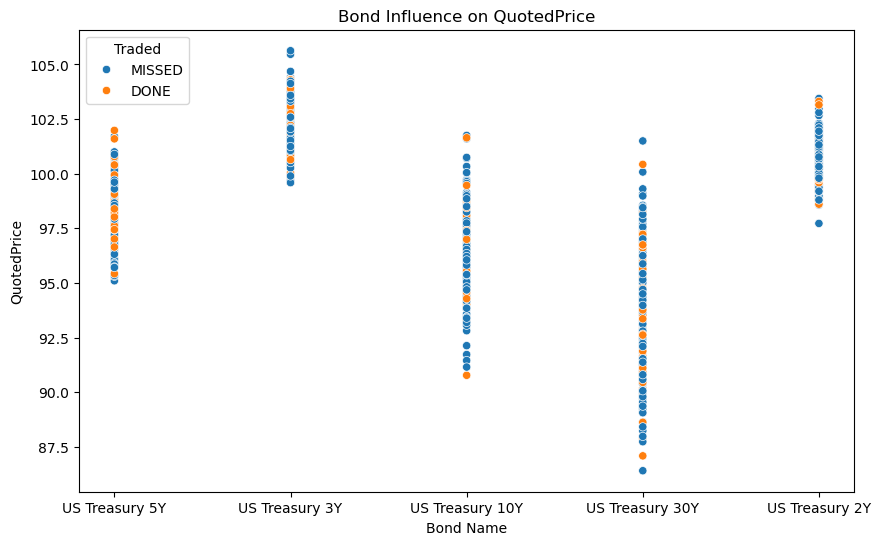

In [6]:
print("Statistical Summary:\n", data.describe())

# Calculate Success Rate by Counterparty and Side
success_rate = data.groupby(['Counterparty', 'Side'])['Traded'].value_counts(normalize=True).unstack().fillna(0)
print("\nSuccess Rate by Counterparty and Side:\n", success_rate)

# Plot Success Rate by Counterparty
success_rate.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Success Rate by Counterparty and Side')
plt.xlabel('Counterparty and Side')
plt.ylabel('Proportion of Trades')
plt.xticks(rotation=45)
plt.show()

# Price Spread Analysis: MidPrice vs QuotedPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MidPrice', y='QuotedPrice', hue='Side', data=data)
plt.title('MidPrice vs QuotedPrice by Side')
plt.xlabel('MidPrice')
plt.ylabel('QuotedPrice')
plt.show()

# Competitors vs Traded Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traded', y='Competitors', data=data)
plt.title('Number of Competitors vs Traded Outcome')
plt.xlabel('Trade Outcome')
plt.ylabel('Number of Competitors')
plt.show()

# Notional Size Impact on Trade Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traded', y='Notional', data=data)
plt.title('Notional Size Impact on Trade Outcome')
plt.xlabel('Trade Outcome')
plt.ylabel('Notional Size')
plt.yscale('log')  # Using log scale due to large variations in Notional Size
plt.show()

# Time-Based Trends Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='MidPrice', hue='Side', data=data)
plt.title('Time-Based Trends in MidPrice by Side')
plt.xlabel('Time')
plt.ylabel('MidPrice')
plt.xticks(rotation=45)
plt.show()

# Competitor Influence on QuotedPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Competitors', y='QuotedPrice', hue='Traded', data=data)
plt.title('Competitors Influence on QuotedPrice')
plt.xlabel('Number of Competitors')
plt.ylabel('QuotedPrice')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bond', y='QuotedPrice', hue='Traded', data=data)
plt.title('Bond Influence on QuotedPrice')
plt.xlabel('Bond Name')
plt.ylabel('QuotedPrice')
plt.show()

#### Data Prepare

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#data.set_index('Time', inplace = True)

data['Counterparty'] = LabelEncoder().fit_transform(data['Counterparty'])
#data['Traded'] = LabelEncoder().fit_transform(data['Traded'])
data['Traded'] = data['Traded'].replace({'DONE': 1, 'MISSED': 0})
data['spread'] = data['QuotedPrice'] - data['MidPrice']

data.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3548\3613178104.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Traded'] = data['Traded'].replace({'DONE': 1, 'MISSED': 0})


,Bond,Side,Notional,Counterparty,MidPrice,QuotedPrice,Competitors,Traded,nextMidPrice,spread
Time,,,,,,,,,,
5,US Treasury 5Y,ASK,500000,4,98.629,98.717,7,0,98.686,0.088
14,US Treasury 5Y,BID,2500000,3,98.502,98.443,5,1,98.419,-0.059
21,US Treasury 3Y,BID,100000,2,102.080,102.027,6,0,101.971,-0.053
26,US Treasury 10Y,BID,5000000,1,97.753,97.651,3,0,97.788,-0.102
31,US Treasury 3Y,ASK,100000,5,101.279,101.398,3,0,101.374,0.119


#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def get_feature_importance(model, feature_names):
    coefficients = model.coef_.flatten()
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    return feature_importance


In [50]:
# Unbalanced

In [226]:
bond_data = data.copy()
ask_data = bond_data[bond_data['Side'] == 'ASK']
bid_data = bond_data[bond_data['Side'] == 'BID']

ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
ask_y = ask_data['Traded']

ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)

ask_scaler = StandardScaler()
ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
ask_X_test_scaled = ask_scaler.transform(ask_X_test)

ask_logistic_model = LogisticRegression(random_state=42, C=0.1)
ask_logistic_model.fit(ask_X_train_scaled, ask_y_train)
ask_logistic_test_probabilities = ask_logistic_model.predict_proba(ask_X_test_scaled)[:, 1]
ask_y_pred = ask_logistic_model.predict(ask_X_test_scaled)

ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
ask_report = classification_report(ask_y_test, ask_y_pred)
ask_logistic_auc = roc_auc_score(ask_y_test, ask_logistic_test_probabilities)

print('\n')
print(f"Bond- Ask Side Results")
print("Accuracy:", ask_accuracy)
print("Confusion Matrix:\n", ask_conf_matrix)
print("Classification Report:\n", ask_report)
ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
print("Feature Importance:\n", ask_feature_importance)
print("AUC Score:", ask_logistic_auc)

bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
bid_y = bid_data['Traded']

bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

bid_scaler = StandardScaler()
bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
bid_X_test_scaled = bid_scaler.transform(bid_X_test)

bid_logistic_model = LogisticRegression(random_state=42, C=0.1)
bid_logistic_model.fit(bid_X_train_scaled, bid_y_train)
bid_logistic_test_probabilities = bid_logistic_model.predict_proba(bid_X_test_scaled)[:, 1]

bid_y_pred = bid_logistic_model.predict(bid_X_test_scaled)
bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
bid_report = classification_report(bid_y_test, bid_y_pred)
bid_logistic_auc = roc_auc_score(bid_y_test, bid_logistic_test_probabilities)

print('\n')
print(f"Bond - Bid Side Results")
print("Accuracy:", bid_accuracy)
print("Confusion Matrix:\n", bid_conf_matrix)
print("Classification Report:\n", bid_report)
bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
print("Feature Importance:\n", bid_feature_importance)
print("AUC Score:", bid_logistic_auc)



Bond- Ask Side Results
Accuracy: 0.8217821782178217
Confusion Matrix:
 [[64  3]
 [15 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        67
           1       0.86      0.56      0.68        34

    accuracy                           0.82       101
   macro avg       0.84      0.76      0.78       101
weighted avg       0.83      0.82      0.81       101

Feature Importance:
        Feature  Coefficient
0     Notional     0.463904
1     MidPrice     0.025040
2  Competitors    -0.833278
3       spread    -1.404878
AUC Score: 0.869622475856014


Bond - Bid Side Results
Accuracy: 0.83
Confusion Matrix:
 [[70  3]
 [14 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        73
           1       0.81      0.48      0.60        27

    accuracy                           0.83       100
   macro avg       0.82      0.72      0.75   

In [48]:
# Balanced

In [228]:
bond_data = data.copy()
ask_data = bond_data[bond_data['Side'] == 'ASK']
bid_data = bond_data[bond_data['Side'] == 'BID']

ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
ask_y = ask_data['Traded']

ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)

ask_scaler = StandardScaler()
ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
ask_X_test_scaled = ask_scaler.transform(ask_X_test)

ask_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
ask_logistic_model.fit(ask_X_train_scaled, ask_y_train)
ask_logistic_test_probabilities = ask_logistic_model.predict_proba(ask_X_test_scaled)[:, 1]
ask_y_pred = ask_logistic_model.predict(ask_X_test_scaled)

ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
ask_report = classification_report(ask_y_test, ask_y_pred)
ask_logistic_auc = roc_auc_score(ask_y_test, ask_logistic_test_probabilities)

print('\n')
print(f"Bond- Ask Side Results")
print("Accuracy:", ask_accuracy)
print("Confusion Matrix:\n", ask_conf_matrix)
print("Classification Report:\n", ask_report)
ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
print("Feature Importance:\n", ask_feature_importance)
print("AUC Score:", ask_logistic_auc)

bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
bid_y = bid_data['Traded']

bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

bid_scaler = StandardScaler()
bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
bid_X_test_scaled = bid_scaler.transform(bid_X_test)

bid_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
bid_logistic_model.fit(bid_X_train_scaled, bid_y_train)
bid_logistic_test_probabilities = bid_logistic_model.predict_proba(bid_X_test_scaled)[:, 1]

bid_y_pred = bid_logistic_model.predict(bid_X_test_scaled)
bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
bid_report = classification_report(bid_y_test, bid_y_pred)
bid_logistic_auc = roc_auc_score(bid_y_test, bid_logistic_test_probabilities)

print('\n')
print(f"Bond - Bid Side Results")
print("Accuracy:", bid_accuracy)
print("Confusion Matrix:\n", bid_conf_matrix)
print("Classification Report:\n", bid_report)
bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
print("Feature Importance:\n", bid_feature_importance)
print("AUC Score:", bid_logistic_auc)



Bond- Ask Side Results
Accuracy: 0.7722772277227723
Confusion Matrix:
 [[51 16]
 [ 7 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        67
           1       0.63      0.79      0.70        34

    accuracy                           0.77       101
   macro avg       0.75      0.78      0.76       101
weighted avg       0.79      0.77      0.78       101

Feature Importance:
        Feature  Coefficient
0     Notional     0.490519
1     MidPrice    -0.008604
2  Competitors    -0.889251
3       spread    -1.503065
AUC Score: 0.8700614574187884


Bond - Bid Side Results
Accuracy: 0.8
Confusion Matrix:
 [[56 17]
 [ 3 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85        73
           1       0.59      0.89      0.71        27

    accuracy                           0.80       100
   macro avg       0.77      0.83      0.78   

In [29]:
# Unbalanced Dataset for individual bond group

In [96]:
unique_bonds = data['Bond'].unique()
ask_results_unbalanced = {}
bid_results_unbalanced = {}

for bond in unique_bonds:
    bond_data = data[data['Bond'] == bond]
    
    ask_data = bond_data[bond_data['Side'] == 'ASK']
    bid_data = bond_data[bond_data['Side'] == 'BID']

    ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond'])
    ask_y = ask_data['Traded']

    ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)
    
    ask_scaler = StandardScaler()
    ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
    ask_X_test_scaled = ask_scaler.transform(ask_X_test)

    ask_logistic_model = LogisticRegression(random_state=42, C=0.1)
    ask_logistic_model.fit(ask_X_train_scaled, ask_y_train)

    ask_y_pred = ask_logistic_model.predict(ask_X_test_scaled)

    ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
    ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
    ask_report = classification_report(ask_y_test, ask_y_pred)

    print('\n')
    print(f"Bond {bond} - Ask Side Results")
    print("Accuracy:", ask_accuracy)
    print("Confusion Matrix:\n", ask_conf_matrix)
    print("Classification Report:\n", ask_report)
    ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
    print("Feature Importance:\n", ask_feature_importance)
    
    ask_results_unbalanced[bond] = {
        'accuracy': ask_accuracy,
        'confusion_matrix': ask_conf_matrix,
        'report': ask_report,
        'Feature Importance:\n':ask_feature_importance
    }

    bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond'])
    bid_y = bid_data['Traded']

    bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

    bid_scaler = StandardScaler()
    bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
    bid_X_test_scaled = bid_scaler.transform(bid_X_test)

    bid_logistic_model = LogisticRegression(random_state=42, C=0.1)
    bid_logistic_model.fit(bid_X_train_scaled, bid_y_train)

    bid_y_pred = bid_logistic_model.predict(bid_X_test_scaled)
    bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
    bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
    bid_report = classification_report(bid_y_test, bid_y_pred)
    
    print('\n')
    print(f"Bond {bond} - Bid Side Results")
    print("Accuracy:", bid_accuracy)
    print("Confusion Matrix:\n", bid_conf_matrix)
    print("Classification Report:\n", bid_report)
    bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
    print("Feature Importance:\n", bid_feature_importance)
    
    bid_results_unbalanced[bond] = {
        'accuracy': bid_accuracy,
        'confusion_matrix': bid_conf_matrix,
        'report': bid_report,
        'Feature Importance:\n':bid_feature_importance
    }



Bond US Treasury 5Y - Ask Side Results
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[13  0]
 [ 7  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.12      0.22         8

    accuracy                           0.67        21
   macro avg       0.82      0.56      0.51        21
weighted avg       0.78      0.67      0.57        21

Feature Importance:
        Feature  Coefficient
0     Notional     0.165328
1     MidPrice     0.113677
2  QuotedPrice     0.074638
3  Competitors    -0.492634
4       spread    -0.641775


Bond US Treasury 5Y - Bid Side Results
Accuracy: 0.7391304347826086
Confusion Matrix:
 [[13  0]
 [ 6  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.40      0.57        10

    accuracy                           0.74        23
  

In [98]:
# Balanced Dataset

In [102]:
unique_bonds = data['Bond'].unique()
ask_results_balanced = {}
bid_results_balanced = {}

for bond in unique_bonds:
    bond_data = data[data['Bond'] == bond]
    
    ask_data = bond_data[bond_data['Side'] == 'ASK']
    bid_data = bond_data[bond_data['Side'] == 'BID']

    ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond'])
    ask_y = ask_data['Traded']

    ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)
    
    ask_scaler = StandardScaler()
    ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
    ask_X_test_scaled = ask_scaler.transform(ask_X_test)

    ask_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
    ask_logistic_model.fit(ask_X_train_scaled, ask_y_train)

    ask_y_pred = ask_logistic_model.predict(ask_X_test_scaled)

    ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
    ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
    ask_report = classification_report(ask_y_test, ask_y_pred)

    print('\n')
    print(f"Bond {bond} - Ask Side Results")
    print("Accuracy:", ask_accuracy)
    print("Confusion Matrix:\n", ask_conf_matrix)
    print("Classification Report:\n", ask_report)
    ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
    print("Feature Importance:\n", ask_feature_importance)
    
    ask_results_balanced[bond] = {
        'accuracy': ask_accuracy,
        'confusion_matrix': ask_conf_matrix,
        'report': ask_report,
        'Feature Importance:\n':ask_feature_importance
    }

    bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond'])
    bid_y = bid_data['Traded']

    bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

    bid_scaler = StandardScaler()
    bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
    bid_X_test_scaled = bid_scaler.transform(bid_X_test)

    bid_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
    bid_logistic_model.fit(bid_X_train_scaled, bid_y_train)

    bid_y_pred = bid_logistic_model.predict(bid_X_test_scaled)
    bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
    bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
    bid_report = classification_report(bid_y_test, bid_y_pred)
    
    print('\n')
    print(f"Bond {bond} - Bid Side Results")
    print("Accuracy:", bid_accuracy)
    print("Confusion Matrix:\n", bid_conf_matrix)
    print("Classification Report:\n", bid_report)
    bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
    print("Feature Importance:\n", bid_feature_importance)
    
    bid_results_balanced[bond] = {
        'accuracy': bid_accuracy,
        'confusion_matrix': bid_conf_matrix,
        'report': bid_report,
        'Feature Importance:\n':bid_feature_importance
    }



Bond US Treasury 5Y - Ask Side Results
Accuracy: 0.9047619047619048
Confusion Matrix:
 [[12  1]
 [ 1  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Feature Importance:
        Feature  Coefficient
0     Notional     0.195870
1     MidPrice     0.138592
2  QuotedPrice     0.092622
3  Competitors    -0.568566
4       spread    -0.756194


Bond US Treasury 5Y - Bid Side Results
Accuracy: 0.782608695652174
Confusion Matrix:
 [[10  3]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.73      0.80      0.76        10

    accuracy                           0.78        23
   

In [212]:
def predict_probability_for_quoted_price(model, scaler, X_sample, new_quoted_price):
    X_sample_copy = X_sample.copy()
    X_sample_copy['spread'] = new_quoted_price - X_sample_copy['MidPrice'] 
    X_sample_scaled = scaler.transform(X_sample_copy)
    probabilities = model.predict_proba(X_sample_scaled)[0]
    print(f"For QuotedPrice={new_quoted_price}: Probability of Missed: {probabilities[0]:.2f}, Probability of Traded: {probabilities[1]:.2f}")


In [210]:
sample = bid_X_test.iloc[2:3]  # Take a sample from the test set
predict_probability_for_quoted_price(bid_logistic_model, bid_scaler, sample, new_quoted_price=104)

For QuotedPrice=104: Probability of Missed: 0.34, Probability of Traded: 0.66


In [164]:
bid_X_test.iloc[2:3]

,Notional,MidPrice,Competitors,spread
Time,,,,
2009,2500000,103.864,1,-0.116


#### Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

bond_data = data.copy()
ask_data = bond_data[bond_data['Side'] == 'ASK']
bid_data = bond_data[bond_data['Side'] == 'BID']

ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
ask_y = ask_data['Traded']

ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)

ask_scaler = StandardScaler()
ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
ask_X_test_scaled = ask_scaler.transform(ask_X_test)

ask_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
ask_rf_model.fit(ask_X_train_scaled, ask_y_train)
ask_rf_test_probabilities = ask_rf_model.predict_proba(ask_X_test_scaled)[:, 1]
ask_y_pred = ask_rf_model.predict(ask_X_test_scaled)

ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
ask_report = classification_report(ask_y_test, ask_y_pred)
ask_rf_auc = roc_auc_score(ask_y_test, ask_rf_test_probabilities)

print('\n')
print(f"Bond- Ask Side Results")
print("Accuracy:", ask_accuracy)
print("Confusion Matrix:\n", ask_conf_matrix)
print("Classification Report:\n", ask_report)
ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
print("Feature Importance:\n", ask_feature_importance)
print("AUC Score:", ask_rf_auc)

bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
bid_y = bid_data['Traded']

bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

bid_scaler = StandardScaler()
bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
bid_X_test_scaled = bid_scaler.transform(bid_X_test)

bid_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
bid_rf_model.fit(bid_X_train_scaled, bid_y_train)
bid_rf_test_probabilities = bid_rf_model.predict_proba(bid_X_test_scaled)[:, 1]
bid_y_pred = bid_rf_model.predict(bid_X_test_scaled)

bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
bid_report = classification_report(bid_y_test, bid_y_pred)
bid_rf_auc = roc_auc_score(bid_y_test, bid_rf_test_probabilities)

print('\n')
print(f"Bond - Bid Side Results")
print("Accuracy:", bid_accuracy)
print("Confusion Matrix:\n", bid_conf_matrix)
print("Classification Report:\n", bid_report)
bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
print("Feature Importance:\n", bid_feature_importance)
print("AUC Score:", bid_rf_auc)



Bond- Ask Side Results
Accuracy: 0.7920792079207921
Confusion Matrix:
 [[61  6]
 [15 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        67
           1       0.76      0.56      0.64        34

    accuracy                           0.79       101
   macro avg       0.78      0.73      0.75       101
weighted avg       0.79      0.79      0.78       101

Feature Importance:
        Feature  Coefficient
0     Notional     0.490519
1     MidPrice    -0.008604
2  Competitors    -0.889251
3       spread    -1.503065
AUC Score: 0.83801580333626


Bond - Bid Side Results
Accuracy: 0.81
Confusion Matrix:
 [[67  6]
 [13 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88        73
           1       0.70      0.52      0.60        27

    accuracy                           0.81       100
   macro avg       0.77      0.72      0.74    

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters for Ask Data:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Cross-Validation AUC Scores for Ask Data: [0.83333333 0.88405797 0.86956522 0.85267857 0.91294643]
Mean Cross-Validation AUC Score for Ask Data: 0.8705163043478261

Optimized Random Forest Model Results for Ask Data
Accuracy: 0.7920792079207921
Confusion Matrix:
 [[56 11]
 [10 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        67
           1       0.69      0.71      0.70        34

    accuracy                           0.79       101
   macro avg       0.77      0.77      0.77       101
weighted avg       0.79      0.79      0.79       101

Test AUC Score: 0.8345039508340649


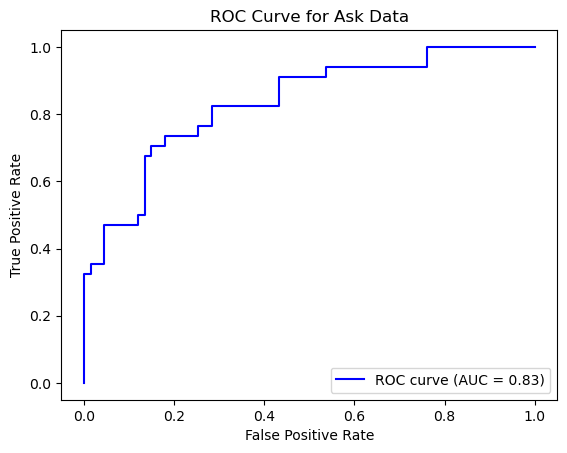

Optimized Random Forest Feature Importance for Ask Data:
        Feature  Importance
0     Notional    0.107017
1     MidPrice    0.134701
2  Competitors    0.241716
3       spread    0.516566
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters for Bid Data:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation AUC Scores for Bid Data: [0.84342211 0.88781275 0.91202583 0.9        0.90084746]
Mean Cross-Validation AUC Score for Bid Data: 0.888821630347054

Optimized Random Forest Model Results for Bid Data
Accuracy: 0.78
Confusion Matrix:
 [[61 12]
 [10 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        73
           1       0.59      0.63      0.61        27

    accuracy                           0.78       100
   macro avg       0.72      0.73      0.73       100
weighted avg       0.79      0.78      0.78       100



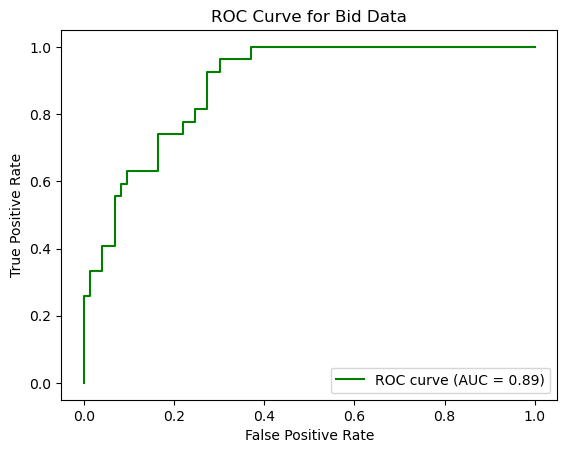

Optimized Random Forest Feature Importance for Bid Data:
        Feature  Importance
0     Notional    0.086340
1     MidPrice    0.148579
2  Competitors    0.255504
3       spread    0.509577


In [246]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
ask_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# GridSearchCV with verbose to show progress
ask_grid_search = GridSearchCV(estimator=ask_rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='roc_auc')
ask_grid_search.fit(ask_X_train_scaled, ask_y_train)

# Get the best estimator for Ask data
best_ask_rf_model = ask_grid_search.best_estimator_

# Output the best hyperparameters
print("\nBest Hyperparameters for Ask Data:")
print(ask_grid_search.best_params_)

# Cross-validation on the best model to determine its performance
cv_auc_scores = cross_val_score(best_ask_rf_model, ask_X_train_scaled, ask_y_train, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores for Ask Data:", cv_auc_scores)
print("Mean Cross-Validation AUC Score for Ask Data:", np.mean(cv_auc_scores))

# Predict the probability of a trade occurring with the best Random Forest model for Ask data
ask_rf_test_probabilities = best_ask_rf_model.predict_proba(ask_X_test_scaled)[:, 1]
ask_y_pred = best_ask_rf_model.predict(ask_X_test_scaled)

# Evaluating the optimized Random Forest model for Ask data
ask_rf_accuracy = accuracy_score(ask_y_test, ask_y_pred)
ask_rf_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
ask_rf_report = classification_report(ask_y_test, ask_y_pred)
ask_rf_auc = roc_auc_score(ask_y_test, ask_rf_test_probabilities)

print("\nOptimized Random Forest Model Results for Ask Data")
print("Accuracy:", ask_rf_accuracy)
print("Confusion Matrix:\n", ask_rf_conf_matrix)
print("Classification Report:\n", ask_rf_report)
print("Test AUC Score:", ask_rf_auc)

# Plotting ROC Curve for Ask data
fpr, tpr, thresholds = roc_curve(ask_y_test, ask_rf_test_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {ask_rf_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ask Data')
plt.legend(loc='lower right')
plt.show()

# Feature importance for the best Random Forest model for Ask data
ask_rf_feature_importance = pd.DataFrame({'Feature': ask_X.columns, 'Importance': best_ask_rf_model.feature_importances_})
print("Optimized Random Forest Feature Importance for Ask Data:\n", ask_rf_feature_importance)

bid_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
bid_grid_search = GridSearchCV(estimator=bid_rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='roc_auc')
bid_grid_search.fit(bid_X_train_scaled, bid_y_train)

# Get the best estimator for Bid data
best_bid_rf_model = bid_grid_search.best_estimator_

# Output the best hyperparameters
print("\nBest Hyperparameters for Bid Data:")
print(bid_grid_search.best_params_)

# Cross-validation on the best model to determine its performance
cv_auc_scores_bid = cross_val_score(best_bid_rf_model, bid_X_train_scaled, bid_y_train, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores for Bid Data:", cv_auc_scores_bid)
print("Mean Cross-Validation AUC Score for Bid Data:", np.mean(cv_auc_scores_bid))

# Predict the probability of a trade occurring with the best Random Forest model for Bid data
bid_rf_test_probabilities = best_bid_rf_model.predict_proba(bid_X_test_scaled)[:, 1]
bid_y_pred = best_bid_rf_model.predict(bid_X_test_scaled)

# Evaluating the optimized Random Forest model for Bid data
bid_rf_accuracy = accuracy_score(bid_y_test, bid_y_pred)
bid_rf_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
bid_rf_report = classification_report(bid_y_test, bid_y_pred)
bid_rf_auc = roc_auc_score(bid_y_test, bid_rf_test_probabilities)

print("\nOptimized Random Forest Model Results for Bid Data")
print("Accuracy:", bid_rf_accuracy)
print("Confusion Matrix:\n", bid_rf_conf_matrix)
print("Classification Report:\n", bid_rf_report)
print("Test AUC Score:", bid_rf_auc)

# Plotting ROC Curve for Bid data
fpr, tpr, thresholds = roc_curve(bid_y_test, bid_rf_test_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {bid_rf_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bid Data')
plt.legend(loc='lower right')
plt.show()

# Feature importance for the best Random Forest model for Bid data
bid_rf_feature_importance = pd.DataFrame({'Feature': bid_X.columns, 'Importance': best_bid_rf_model.feature_importances_})
print("Optimized Random Forest Feature Importance for Bid Data:\n", bid_rf_feature_importance)


### Part 2

In [269]:
pip install shimmy>=0.2.1

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0 which is incompatible.


In [279]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import spaces
import pandas as pd
import numpy as np

# Assuming 'QuotedPrice' and 'MidPrice' are part of the data and necessary preprocessing steps have been done
# Preprocess the data
data['Side'] = LabelEncoder().fit_transform(data['Side'])
data['Counterparty'] = LabelEncoder().fit_transform(data['Counterparty'])
data['Traded'] = data['Traded'].replace({'DONE': 1, 'MISSED': 0})
data['spread'] = data['QuotedPrice'] - data['MidPrice']

# Split the data into Ask and Bid datasets
ask_data = data[data['Side'] == 0]  # Assuming 0 represents 'ASK'
bid_data = data[data['Side'] == 1]  # Assuming 1 represents 'BID'

# Define a custom environment for reinforcement learning
class QuotingEnvironment(gym.Env):
    def __init__(self, data):
        super(QuotingEnvironment, self).__init__()
        self.data = data
        self.current_step = 0

        # Action space: Quote price as a percentage adjustment from the mid price (-5% to 5%)
        self.action_space = spaces.Box(low=-0.05, high=0.05, shape=(1,), dtype=np.float32)

        # Observation space: Features related to market state
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(data.shape[1] - 4,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self._next_observation()

    def _next_observation(self):
        obs = self.data.iloc[self.current_step].drop(['Traded', 'nextMidPrice', 'QuotedPrice', 'Bond'], errors='ignore').values
        return obs

    def step(self, action):
        # Take action: Adjust the quoted price based on action
        current_row = self.data.iloc[self.current_step]
        mid_price = current_row['MidPrice']
        quoted_price = mid_price * (1 + action[0])

        # Calculate reward based on the outcome of the trade
        traded = current_row['Traded']
        next_mid_price = current_row['nextMidPrice']
        if traded == 1:
            reward = next_mid_price - quoted_price  # Profit if the trade was done
        else:
            reward = -abs(next_mid_price - quoted_price)  # Penalty if trade missed

        # Move to the next time step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1
        obs = self._next_observation() if not done else None

        return obs, reward, done, {}

    def render(self, mode='human', close=False):
        # Render the environment to the console
        current_row = self.data.iloc[self.current_step]
        print(f"Step: {self.current_step}, MidPrice: {current_row['MidPrice']}, QuotedPrice: {current_row['QuotedPrice']}")

# Create the environment
ask_env = QuotingEnvironment(ask_data)
ask_env = DummyVecEnv([lambda: ask_env])

# Initialize the PPO model
model = PPO('MlpPolicy', ask_env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the trained model
model.save("ppo_quoting_model")

# Load the model and evaluate
eval_env = QuotingEnvironment(ask_data)
eval_env = DummyVecEnv([lambda: eval_env])
model = PPO.load("ppo_quoting_model")

obs = eval_env.reset()
done = False
total_reward = 0
while not done:
    action, _states = model.predict(obs)
    obs, reward, done, info = eval_env.step(action)
    total_reward += reward

print(f"Total Reward after evaluation: {total_reward}")


C:\Users\kelvi\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 938  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008716718 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0003      |
|    loss                 | 922         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0085     |
|    std                  | 0.986       |
|    value_loss           | 2.27e+03    |
-----------------

C:\Users\kelvi\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Total Reward after evaluation: [-1324.5421]


## Model Saving

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel(r'C:\Users\kelvi\Desktop\ORIE5257 2024 Assignment.xlsx')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data.set_index('Time', inplace = True)
data['Traded'] = data['Traded'].replace({'DONE': 1, 'MISSED': 0})
data['spread'] = data['QuotedPrice'] - data['MidPrice']

data.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6980\3687544871.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Traded'] = data['Traded'].replace({'DONE': 1, 'MISSED': 0})


,Bond,Side,Notional,Counterparty,MidPrice,QuotedPrice,Competitors,Traded,nextMidPrice,spread
Time,,,,,,,,,,
5,US Treasury 5Y,ASK,500000,SniperFund,98.629,98.717,7,0,98.686,0.088
14,US Treasury 5Y,BID,2500000,SleepyManager,98.502,98.443,5,1,98.419,-0.059
21,US Treasury 3Y,BID,100000,RelativeValueStrategies,102.080,102.027,6,0,101.971,-0.053
26,US Treasury 10Y,BID,5000000,HF-Fortress,97.753,97.651,3,0,97.788,-0.102
31,US Treasury 3Y,ASK,100000,TankerAssetManagement,101.279,101.398,3,0,101.374,0.119


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def get_feature_importance(model, feature_names):
    coefficients = model.coef_.flatten()
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    return feature_importance


In [11]:
bond_data = data.copy()
ask_data = bond_data[bond_data['Side'] == 'ASK']
bid_data = bond_data[bond_data['Side'] == 'BID']

ask_X = ask_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
ask_y = ask_data['Traded']

ask_X_train, ask_X_test, ask_y_train, ask_y_test = train_test_split(ask_X, ask_y, test_size=0.2, random_state=42)

ask_scaler = StandardScaler()
ask_X_train_scaled = ask_scaler.fit_transform(ask_X_train)
ask_X_test_scaled = ask_scaler.transform(ask_X_test)

ask_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
ask_logistic_model.fit(ask_X_train_scaled, ask_y_train)
ask_logistic_test_probabilities = ask_logistic_model.predict_proba(ask_X_test_scaled)[:, 1]
ask_y_pred = ask_logistic_model.predict(ask_X_test_scaled)

ask_accuracy = accuracy_score(ask_y_test, ask_y_pred)
ask_conf_matrix = confusion_matrix(ask_y_test, ask_y_pred)
ask_report = classification_report(ask_y_test, ask_y_pred)
ask_logistic_auc = roc_auc_score(ask_y_test, ask_logistic_test_probabilities)

print('\n')
print(f"Bond- Ask Side Results")
print("Accuracy:", ask_accuracy)
print("Confusion Matrix:\n", ask_conf_matrix)
print("Classification Report:\n", ask_report)
ask_feature_importance = get_feature_importance(ask_logistic_model, ask_X.columns)
print("Feature Importance:\n", ask_feature_importance)
print("AUC Score:", ask_logistic_auc)

bid_X = bid_data.drop(columns=['Traded', 'nextMidPrice', 'Counterparty', 'Side', 'Bond', 'QuotedPrice'])
bid_y = bid_data['Traded']

bid_X_train, bid_X_test, bid_y_train, bid_y_test = train_test_split(bid_X, bid_y, test_size=0.2, random_state=42)

bid_scaler = StandardScaler()
bid_X_train_scaled = bid_scaler.fit_transform(bid_X_train)
bid_X_test_scaled = bid_scaler.transform(bid_X_test)

bid_logistic_model = LogisticRegression(random_state=42, C=0.1, class_weight='balanced')
bid_logistic_model.fit(bid_X_train_scaled, bid_y_train)
bid_logistic_test_probabilities = bid_logistic_model.predict_proba(bid_X_test_scaled)[:, 1]

bid_y_pred = bid_logistic_model.predict(bid_X_test_scaled)
bid_accuracy = accuracy_score(bid_y_test, bid_y_pred)
bid_conf_matrix = confusion_matrix(bid_y_test, bid_y_pred)
bid_report = classification_report(bid_y_test, bid_y_pred)
bid_logistic_auc = roc_auc_score(bid_y_test, bid_logistic_test_probabilities)

print('\n')
print(f"Bond - Bid Side Results")
print("Accuracy:", bid_accuracy)
print("Confusion Matrix:\n", bid_conf_matrix)
print("Classification Report:\n", bid_report)
bid_feature_importance = get_feature_importance(bid_logistic_model, bid_X.columns)
print("Feature Importance:\n", bid_feature_importance)
print("AUC Score:", bid_logistic_auc)



Bond- Ask Side Results
Accuracy: 0.7722772277227723
Confusion Matrix:
 [[51 16]
 [ 7 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        67
           1       0.63      0.79      0.70        34

    accuracy                           0.77       101
   macro avg       0.75      0.78      0.76       101
weighted avg       0.79      0.77      0.78       101

Feature Importance:
        Feature  Coefficient
0     Notional     0.490519
1     MidPrice    -0.008604
2  Competitors    -0.889251
3       spread    -1.503065
AUC Score: 0.8700614574187884


Bond - Bid Side Results
Accuracy: 0.8
Confusion Matrix:
 [[56 17]
 [ 3 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85        73
           1       0.59      0.89      0.71        27

    accuracy                           0.80       100
   macro avg       0.77      0.83      0.78   

In [25]:
import importlib
import model_utils
importlib.reload(model_utils)

<module 'model_utils' from 'C:\\Users\\kelvi\\model_utils.py'>

In [27]:
# import model_utils
model_utils.save_model(bid_logistic_model, 'bid_logistic_model.pkl')
model_utils.save_model(ask_logistic_model, 'ask_logistic_model.pkl')


In [29]:
model_utils.save_model(bid_scaler, 'bid_scaler.pkl')
model_utils.save_model(ask_scaler, 'ask_scaler.pkl')